In [1]:
import collections
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ('inner_mouth', (60, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 35)),
    ("jaw", (0, 17))
])

In [2]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
detector = dlib.get_frontal_face_detector()
# Loads facial landmark predictor using path supplied
predictor = dlib.shape_predictor('/content/gdrive/MyDrive/personality_datasets/shape_predictor_68_face_landmarks.dat')

In [6]:
import pandas as pd
import os
path = os.getcwd()
print(path)
path = "/content/gdrive/MyDrive/personality_datasets/"
data = pd.read_csv(path+'list_attr_celeba.txt', sep=" ", header=None, names=["Image_Name", "5_o_Clock", "Arched_Eyebrows", "Attractive_Bags_Under_Eyes", "Bald", "Bangs", "Big_Lips", "Big_Nose", "Black_Hair", "Blond_Hair", "Blurry", "Brown_Hair", "Bushy_Eyebrows", "Chubby", "Double_Chin", "Eyeglasses","Goatee", "Gray_Hair", "Heavy_Makeup", "High_Cheekbones", "Male", "Mouth_Slightly_Open", "Mustache", "Narrow_Eyes", "No_Beard", "Oval_Face", "Pale_Skin", "Pointy_Nose", "Receding_Hairline", "Rosy_Cheeks", "Sideburns", "Smiling", "Straight_Hair", "Wavy_Hair", "Wearing_Earrings", "Wearing_Hat", "Wearing_Lipstick", "Wearing_Necklace", "Wearing_Necktie", "Young"])
data = data.drop([0, 1])
data = data.reset_index(drop=True)
print(data)

/content


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        Image_Name 5_o_Clock  ... Wearing_Necktie Young
0       000001.jpg        -1  ...              -1    -1
1       000002.jpg        -1  ...             NaN     1
2       000003.jpg        -1  ...              -1    -1
3       000004.jpg        -1  ...              -1   NaN
4       000005.jpg        -1  ...              -1    -1
...            ...       ...  ...             ...   ...
202594  202595.jpg        -1  ...              -1    -1
202595  202596.jpg        -1  ...              -1    -1
202596  202597.jpg        -1  ...             NaN     1
202597  202598.jpg        -1  ...               1    -1
202598  202599.jpg        -1  ...              -1    -1

[202599 rows x 40 columns]


In [7]:
import os
from os import path

count = 0
for file1 in os.listdir('/content/gdrive/MyDrive/personality_datasets/train_full_images/big_nose/'):

  print(file1, " ", count)
  if (path.exists('/content/gdrive/MyDrive/personality_datasets/train_full_nose2/big_nose/' + file1)):
    count +=1
    continue
  image = cv2.imread('/content/gdrive/MyDrive/personality_datasets/train_full_images/big_nose/' + file1) # takes from image headshot
  # print(image)
  image = imutils.resize(image, width=600, height=600) # rescales to width of 500 px
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts to grayscale
  # detect faces in the grayscale image
  # Two arguments: grayscale image, number of image pyramid layers to apply when upscaling image prior to applying the detection
  rects = detector(gray, 1) # creates the bounding box
  print(rects)
  if (len(rects) != 1):
    count += 1
    continue
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # loop over the face parts individually
    a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
    tuple_list = list(a_dict)
    key_value = tuple_list[6]
    print(key_value)
    
    
    # show the particular face part
    name = key_value[0]
    i = key_value[1][0]
    j = key_value[1][1]

    (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
    print(i, j, name)
    roi = image[y1-10:y1 + h1 + 10, x1-15:x1 + w1+15]
    try:
      roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
      # cv2_imshow(roi)
      cv2.imwrite('/content/gdrive/MyDrive/personality_datasets/train_full_nose2/big_nose/' + file1, roi)
    except:
      count += 1
      continue

Streaming output truncated to the last 5000 lines.
('nose', (27, 36))
27 36 nose
067432.jpg   137
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067437.jpg   137
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067423.jpg   137
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067442.jpg   137
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067460.jpg   137
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067476.jpg   137
rectangles[]
067451.jpg   138
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067441.jpg   138
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067499.jpg   138
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067559.jpg   138
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
067567.jpg   138
rectangles[[(171, 290) (438, 558)]]
('nose', (27, 36))
27 36 nose
067566.jpg   138
rectangles[[(134, 277) (455, 598)]]
('nose

In [8]:
import os
from os import path
count = 0
for file1 in os.listdir('/content/gdrive/MyDrive/personality_datasets/train_full_images/no_big_nose/'):

  print(file1, " ", count)

  if (path.exists('/content/gdrive/MyDrive/personality_datasets/train_full_nose2/no_big_nose/' + file1)):
    count +=1
    continue
  image = cv2.imread('/content/gdrive/MyDrive/personality_datasets/train_full_images/no_big_nose/' + file1) # takes from image headshot
  # print(image)
  image = imutils.resize(image, width=600, height=600) # rescales to width of 500 px
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts to grayscale
  # detect faces in the grayscale image
  # Two arguments: grayscale image, number of image pyramid layers to apply when upscaling image prior to applying the detection
  rects = detector(gray, 1) # creates the bounding box
  print(rects)
  if (len(rects) != 1):
    count += 1
    continue
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # loop over the face parts individually
    a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
    tuple_list = list(a_dict)
    key_value = tuple_list[6]
    print(key_value)
    
    
    # show the particular face part
    name = key_value[0]
    i = key_value[1][0]
    j = key_value[1][1]

    (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
    print(i, j, name)
    roi = image[y1-10:y1 + h1 + 10, x1-15:x1 + w1+15]
    try:
      roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC) 
      # cv2_imshow(roi)
      cv2.imwrite('/content/gdrive/MyDrive/personality_datasets/train_full_nose2/no_big_nose/' + file1, roi)
      count += 1
    except:
      count += 1
      continue

Streaming output truncated to the last 5000 lines.
('nose', (27, 36))
27 36 nose
078134.jpg   2221
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
078130.jpg   2222
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078127.jpg   2223
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078110.jpg   2224
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078115.jpg   2225
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
078167.jpg   2226
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078156.jpg   2227
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078163.jpg   2228
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078148.jpg   2229
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078155.jpg   2230
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
078147.jpg   2231
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 

In [9]:
import os
count = 0
for file1 in os.listdir('/content/gdrive/MyDrive/personality_datasets/valid_full_images/big_nose/'):

  print(file1, " ", count)
  if (path.exists('/content/gdrive/MyDrive/personality_datasets/valid_full_nose2/big_nose/' + file1)):
    count +=1
    continue
  image = cv2.imread('/content/gdrive/MyDrive/personality_datasets/valid_full_images/big_nose/' + file1) # takes from image headshot
  # print(image)
  image = imutils.resize(image, width=600, height=600) # rescales to width of 500 px
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts to grayscale
  # detect faces in the grayscale image
  # Two arguments: grayscale image, number of image pyramid layers to apply when upscaling image prior to applying the detection
  rects = detector(gray, 1) # creates the bounding box
  print(rects)
  if (len(rects) != 1):
    count += 1
    continue
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # loop over the face parts individually
    a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
    tuple_list = list(a_dict)
    key_value = tuple_list[6]
    print(key_value)
    
    
    # show the particular face part
    name = key_value[0]
    i = key_value[1][0]
    j = key_value[1][1]

    (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
    print(i, j, name)
    roi = image[y1-10:y1 + h1 + 10, x1-15:x1 + w1+15]
    try:
      roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC) 
      # cv2_imshow(roi)
      cv2.imwrite('/content/gdrive/MyDrive/personality_datasets/valid_full_nose2/big_nose/' + file1, roi)
      count += 1
    except:
      count += 1
      continue

Streaming output truncated to the last 5000 lines.
025593.jpg   1027
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
025590.jpg   1028
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
025575.jpg   1029
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025583.jpg   1030
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025628.jpg   1031
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025678.jpg   1032
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025694.jpg   1033
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025712.jpg   1034
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025727.jpg   1035
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
025710.jpg   1036
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
025713.jpg   1037
rectangles[[(171, 290) (438, 558)]]
('nose', (27, 36))
27 36 nose
025707.jpg   1038
rectang

In [10]:
import os
count = 0
for file1 in os.listdir('/content/gdrive/MyDrive/personality_datasets/valid_full_images/no_big_nose/'):

  print(file1, " ", count)
  if (path.exists('/content/gdrive/MyDrive/personality_datasets/valid_full_nose2/no_big_nose/' + file1)):
    count +=1
    continue
  image = cv2.imread('/content/gdrive/MyDrive/personality_datasets/valid_full_images/no_big_nose/' + file1) # takes from image headshot
  # print(image)
  image = imutils.resize(image, width=600, height=600) # rescales to width of 500 px
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts to grayscale
  # detect faces in the grayscale image
  # Two arguments: grayscale image, number of image pyramid layers to apply when upscaling image prior to applying the detection
  rects = detector(gray, 1) # creates the bounding box
  print(rects)
  if (len(rects) != 1):
    count += 1
    continue
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    # loop over the face parts individually
    a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
    tuple_list = list(a_dict)
    key_value = tuple_list[6]
    print(key_value)
    
    
    # show the particular face part
    name = key_value[0]
    i = key_value[1][0]
    j = key_value[1][1]

    (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
    print(i, j, name)
    roi = image[y1-10:y1 + h1 + 10, x1-15:x1 + w1+15]
    try:
      roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
      # cv2_imshow(roi)
      cv2.imwrite('/content/gdrive/MyDrive/personality_datasets/valid_full_nose2/no_big_nose/' + file1, roi)
      count += 1
    except:
      count += 1
      continue

Streaming output truncated to the last 5000 lines.
074021.jpg   1066
rectangles[[(134, 241) (455, 562)]]
('nose', (27, 36))
27 36 nose
074027.jpg   1067
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074008.jpg   1068
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074020.jpg   1069
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
074031.jpg   1070
rectangles[[(171, 320) (438, 587)]]
('nose', (27, 36))
27 36 nose
074029.jpg   1071
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074032.jpg   1072
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074015.jpg   1073
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074024.jpg   1074
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074033.jpg   1075
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074013.jpg   1076
rectangles[[(134, 277) (455, 598)]]
('nose', (27, 36))
27 36 nose
074042.jpg   1077
rectang

In [11]:
print(len(os.listdir('/content/gdrive/MyDrive/personality_datasets/valid_full_images/no_big_nose/')))
# for (i, rect) in enumerate(rects):
#     # determine the facial landmarks for the face region, then
#     # convert the landmark (x, y)-coordinates to a NumPy array
#     shape = predictor(gray, rect)
#     shape = face_utils.shape_to_np(shape)
#     # loop over the face parts individually
#     a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
#     tuple_list = list(a_dict)
#     key_value = tuple_list[7]
#     print(key_value)
    
    
#     # show the particular face part
#     name = key_value[0]
#     i = key_value[1][0]
#     j = key_value[1][1]

#     (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
#     print(i, j, name)
#     roi = image[y1:y1 + h1 + 50, x1:x1 + w1]
#     roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
#     # cv2_imshow(roi)
#     cv2.imwrite('/content/gdrive/MyDrive/personality_datasets/headshot_jaw2.jpg', roi)
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    # clone = image.copy()
    # cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
    #     0.7, (0, 0, 255), 2)
    # # loop over the subset of facial landmarks, drawing the
    # # specific face part
    # for (x, y) in shape[i:j]:
    #     cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
    #     print((x,y))
    # # extract the ROI of the face region as a separate image
    
    # cv2_imshow(clone)
    # cv2.waitKey(0)
    # # visualize all facial landmarks with a transparent overlay
    # output = face_utils.visualize_facial_landmarks(image, shape)
    # cv2_imshow(output)
    # cv2.waitKey(0)

2334


In [ ]:
import os
from os import path
path.exists('/content/gdrive/MyDrive/personality_datasets/headshot.jpg')

True

('nose', (27, 36))
27 36 nose


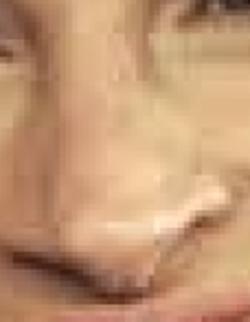

In [ ]:
import os
from os import path

count = 0
image = cv2.imread('/content/gdrive/MyDrive/personality_datasets/images.jpeg') # takes from image headshot
# print(image)
image = imutils.resize(image, width=600, height=600) # rescales to width of 500 px
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converts to grayscale
# detect faces in the grayscale image
# Two arguments: grayscale image, number of image pyramid layers to apply when upscaling image prior to applying the detection
rects = detector(gray, 1) # creates the bounding box
for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the landmark (x, y)-coordinates to a NumPy array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  # loop over the face parts individually
  a_dict = face_utils.FACIAL_LANDMARKS_IDXS.items()
  tuple_list = list(a_dict)
  key_value = tuple_list[6]
  print(key_value)
  
  
  # show the particular face part
  name = key_value[0]
  i = key_value[1][0]
  j = key_value[1][1]

  (x1, y1, w1, h1) = cv2.boundingRect(np.array([shape[i:j]]))
  print(i, j, name)
  roi = image[y1-10:y1 + h1 + 10, x1-15:x1 + w1+15]
  roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
  cv2_imshow(roi)